Found 128 CSV files
311: 21 files
mta: 54 files
tlc: 36 files
weather: 7 files
events: 10 files
other: 0 files
Database Table Counts:
             Table  Row Count
4        tlc_trips    1900000
2    nyc_311_calls     956602
3    mta_turnstile      31654
0  spatial_ref_sys       8500
5          weather       1927
7      task_status         12
1    neighborhoods          0
6           events          0


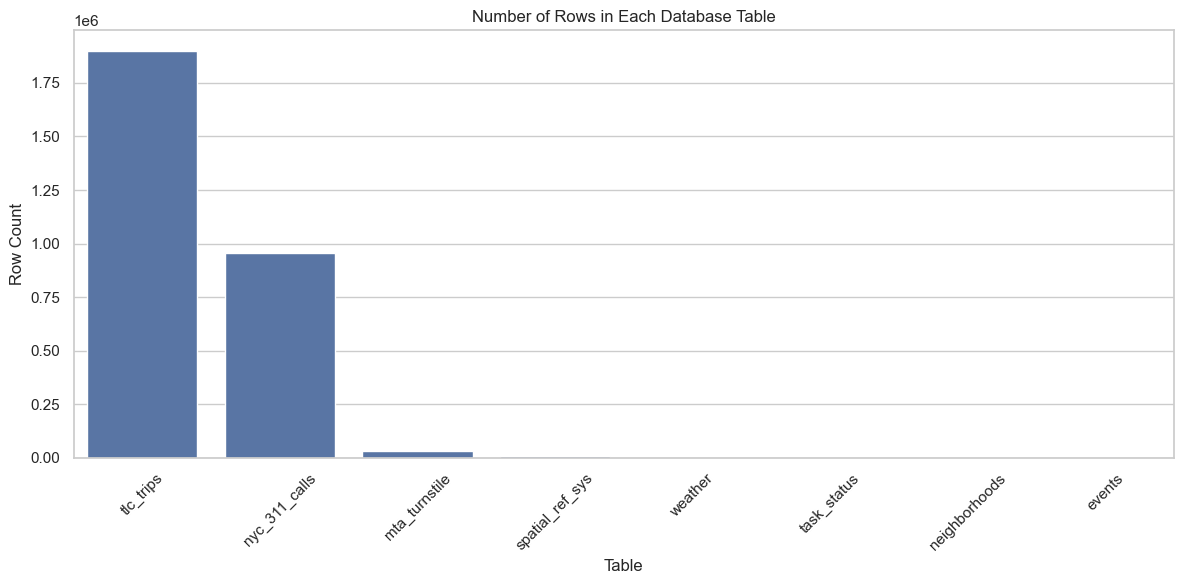

C:\Users\prath\AppData\Local\Temp\ipykernel_16992\2692749546.py:153: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


Error analyzing .\data\events_20220101_20220131.csv: No columns to parse from file

CSV Date Range Summary:
311: 21 files, 1012886 rows
   Date range: 2020-01-01 00:00:00 to 2025-01-05 04:06:53
mta: 54 files, 2700000 rows
   Date range: 2020-07-01 00:00:00 to 2024-12-01 16:00:00
tlc: 36 files, 1800000 rows
   Date range: 2020-01-01 00:00:00 to 2022-12-01 13:36:57
weather: 7 files, 1958 rows
   Date range: 2020-01-01 00:00:00 to 2025-04-10 00:00:00
events: 9 files, 8815740 rows
   Date range: 2020-01-01 00:00:00 to 2024-03-30 15:00:00

Database Date Range Summary:
nyc_311_calls: 956602 rows
   Date range: 2020-01-01 00:00:00 to 2025-01-05 04:06:53
mta_turnstile: 31654 rows
   Date range: 2020-07-01 00:00:00 to 2024-12-01 16:00:00
tlc_trips: 1900000 rows
   Date range: 2020-01-01 00:00:00 to 2022-12-01 13:36:57
weather: 1927 rows
   Date range: 2020-01-01 00:00:00 to 2025-04-10 00:00:00


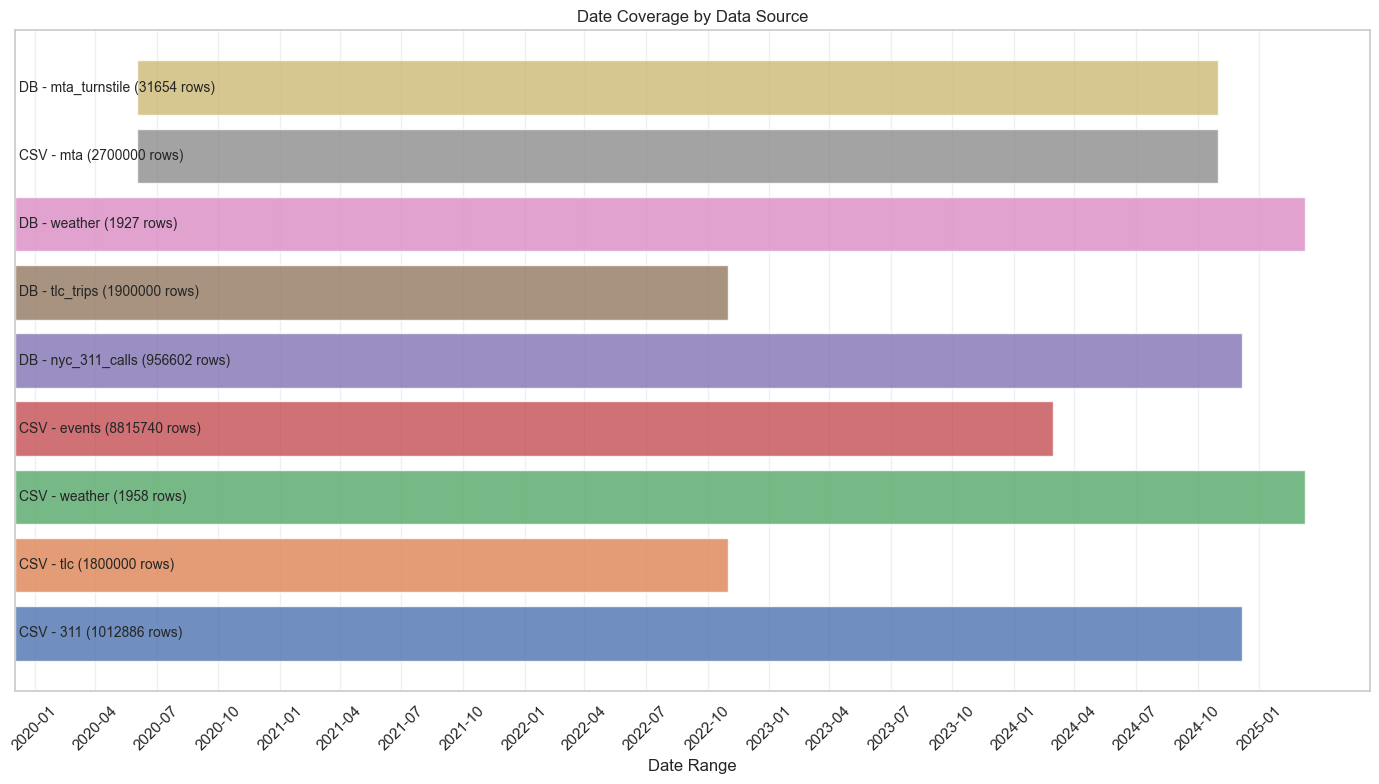


Comparing CSV to Database data:
CSV columns: ['unique_key', 'created_date', 'closed_date', 'agency', 'complaint_type', 'descriptor', 'location_type', 'incident_zip', 'incident_address', 'street_name', 'city', 'borough', 'latitude', 'longitude', 'location']
DB columns: ['id', 'created_date', 'complaint_type', 'descriptor', 'incident_zip', 'geometry', 'neighborhood_id']

Comparison for 311 (CSV) vs nyc_311_calls (DB):
CSV records: 1000
DB records: 1000

Columns in both: 4
Columns only in CSV: 11
Columns only in DB: 3

Date range in CSV: 2020-01-01 00:14:18 to 2020-01-08 22:38:06
Date range in DB: 2023-01-01 00:00:00 to 2023-01-01 07:50:38
CSV columns: ['datetime', 'temperature', 'precipitation', 'wind_speed', 'weather_condition', 'hour', 'day', 'weekday', 'month', 'year']
DB columns: ['id', 'datetime', 'temperature', 'precipitation', 'humidity', 'wind_speed', 'weather_condition']

Comparison for weather (CSV) vs weather (DB):
CSV records: 366
DB records: 1000

Columns in both: 5
Columns

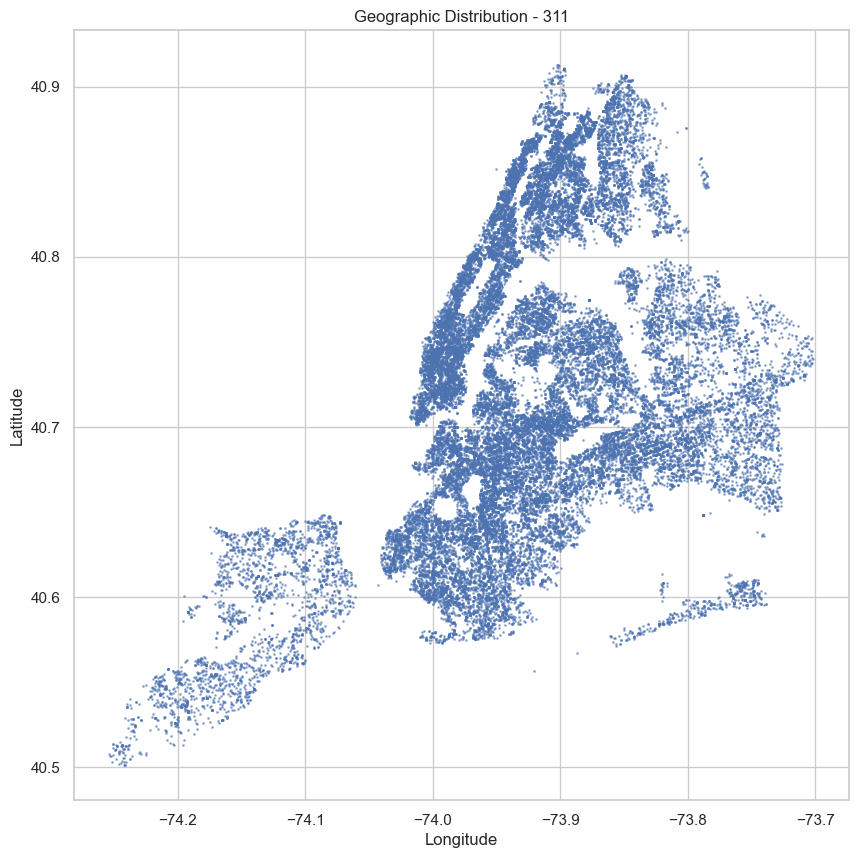


Distribution by Borough:
borough
BROOKLYN         15524
QUEENS           13009
MANHATTAN         9924
BRONX             8442
STATEN ISLAND     2665
Unspecified        325
Name: count, dtype: int64


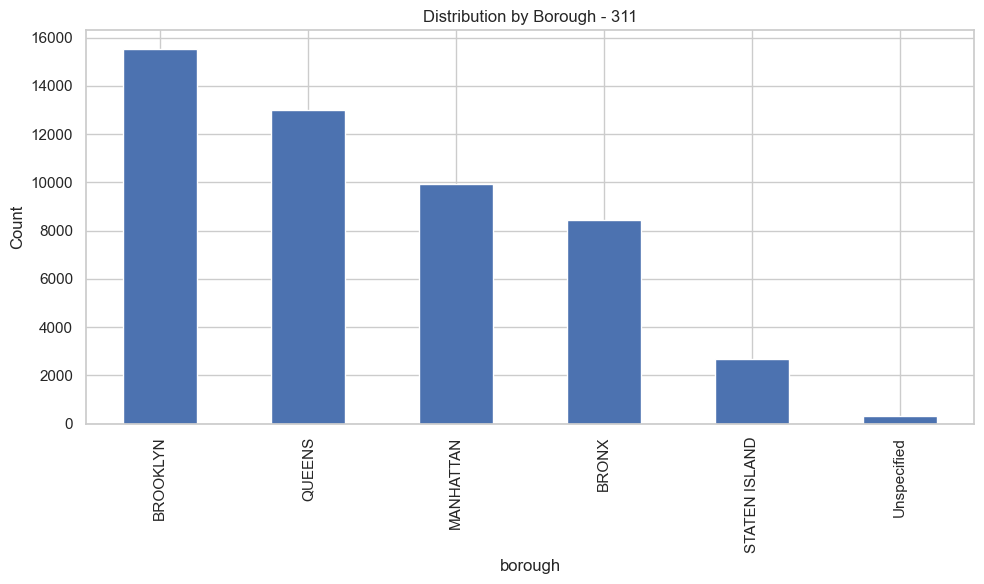


Geographic Analysis for mta CSV files:
File: mta_20200701_20200731.csv
Total rows: 50000
Rows with valid NYC coordinates: 50000 (100.00%)


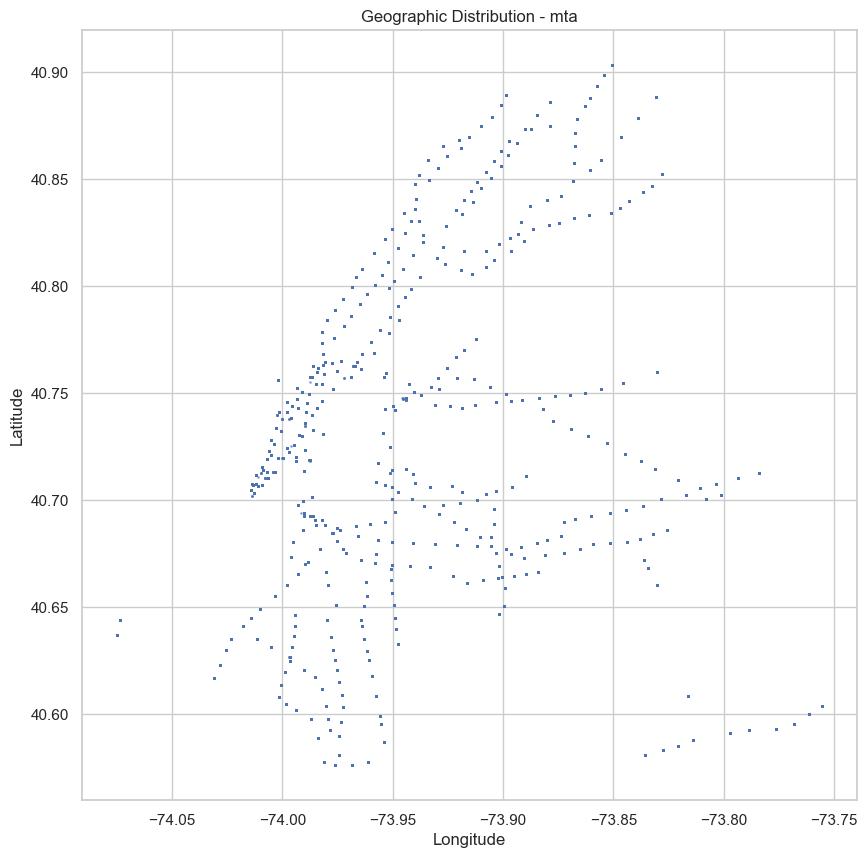


Distribution by Borough:
borough
Brooklyn         17150
Manhattan        15500
Bronx             8721
Queens            8432
Staten Island      197
Name: count, dtype: int64


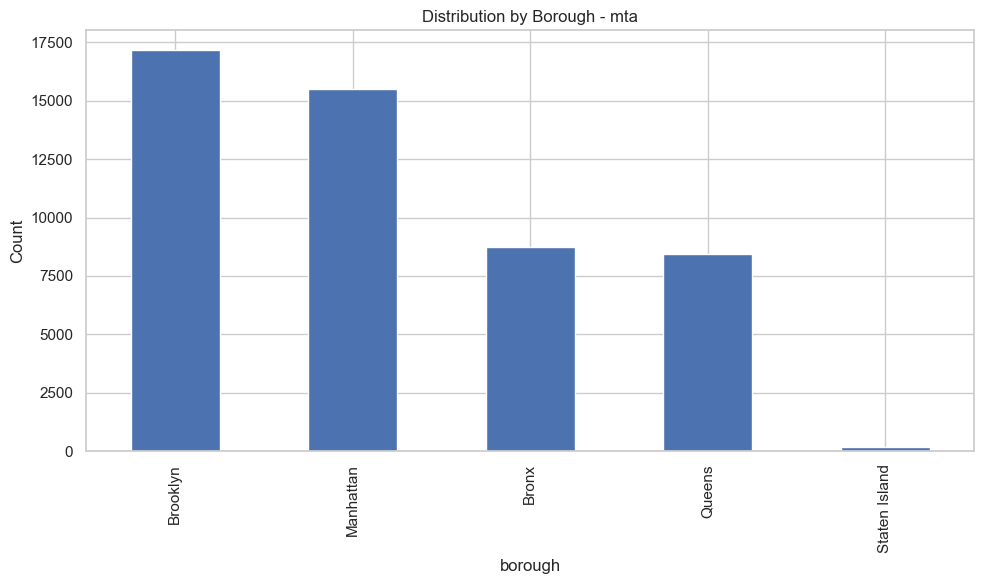


Geographic Analysis for tlc CSV files:
No lat/lon columns found in yellow_taxi_202001_202001.csv
No lat/lon columns found in yellow_taxi_202002_202002.csv
No lat/lon columns found in yellow_taxi_202003_202003.csv
No lat/lon columns found in yellow_taxi_202004_202004.csv
No lat/lon columns found in yellow_taxi_202005_202005.csv
No lat/lon columns found in yellow_taxi_202006_202006.csv
No lat/lon columns found in yellow_taxi_202007_202007.csv
No lat/lon columns found in yellow_taxi_202008_202008.csv
No lat/lon columns found in yellow_taxi_202009_202009.csv
No lat/lon columns found in yellow_taxi_202010_202010.csv
No lat/lon columns found in yellow_taxi_202011_202011.csv
No lat/lon columns found in yellow_taxi_202012_202012.csv
No lat/lon columns found in yellow_taxi_202101_202101.csv
No lat/lon columns found in yellow_taxi_202102_202102.csv
No lat/lon columns found in yellow_taxi_202103_202103.csv
No lat/lon columns found in yellow_taxi_202104_202104.csv
No lat/lon columns found in yell

In [ ]:
# NYC Data Analysis Notebook

## 1. Setup and Configuration

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import psycopg2
from psycopg2.extras import RealDictCursor
import glob
from datetime import datetime
import geopandas as gpd
from dotenv import load_dotenv

# Load environment variables for database connection
load_dotenv()

# Set plot styling
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Database connection function
def get_db_connection():
    """Create a connection to the PostgreSQL database"""
    conn = psycopg2.connect(
        host=os.getenv('DB_HOST'),
        database=os.getenv('DB_NAME'),
        user=os.getenv('DB_USER'),
        password=os.getenv('DB_PASSWORD')
    )
    return conn

# Function to find all CSV files
def find_csv_files(base_dir='.'):
    """Find all CSV files in the given directory and subdirectories"""
    return glob.glob(f"{base_dir}/**/*.csv", recursive=True)

# List all CSV files that were generated
csv_files = find_csv_files()
print(f"Found {len(csv_files)} CSV files")

# Categorize CSV files by type
def categorize_csv_files(csv_files):
    """Categorize CSV files by type (311, MTA, TLC, etc.)"""
    categories = {
        '311': [],
        'mta': [],
        'tlc': [],
        'weather': [],
        'events': [],
        'other': []
    }
    
    for file in csv_files:
        filename = os.path.basename(file)
        if '311' in filename:
            categories['311'].append(file)
        elif 'mta' in filename:
            categories['mta'].append(file)
        elif 'tlc' in filename or 'taxi' in filename:
            categories['tlc'].append(file)
        elif 'weather' in filename:
            categories['weather'].append(file)
        elif 'events' in filename:
            categories['events'].append(file)
        else:
            categories['other'].append(file)
    
    return categories

csv_categories = categorize_csv_files(csv_files)
for category, files in csv_categories.items():
    print(f"{category}: {len(files)} files")

## 2. Database Analysis

# Check tables in the database
def get_table_counts():
    """Get the count of rows in each database table"""
    try:
        conn = get_db_connection()
        cursor = conn.cursor()
        
        # Get all tables in the public schema
        cursor.execute("""
            SELECT table_name
            FROM information_schema.tables
            WHERE table_schema = 'public'
            AND table_type = 'BASE TABLE'
        """)
        
        tables = [row[0] for row in cursor.fetchall()]
        
        # Get count of rows in each table
        table_counts = {}
        for table in tables:
            cursor.execute(f"SELECT COUNT(*) FROM {table}")
            count = cursor.fetchone()[0]
            table_counts[table] = count
        
        conn.close()
        return table_counts
    
    except Exception as e:
        print(f"Error connecting to database: {e}")
        return {}

table_counts = get_table_counts()
table_df = pd.DataFrame(list(table_counts.items()), columns=['Table', 'Row Count'])
table_df = table_df.sort_values('Row Count', ascending=False)

print("Database Table Counts:")
print(table_df)

# Plot table counts
plt.figure(figsize=(12, 6))
sns.barplot(x='Table', y='Row Count', data=table_df)
plt.xticks(rotation=45)
plt.title('Number of Rows in Each Database Table')
plt.tight_layout()
plt.show()

## 3. Data Date Range Analysis

# Function to analyze date ranges in CSV files
def analyze_csv_date_ranges(file_categories):
    """Analyze date ranges in CSV files by category"""
    date_ranges = {}
    
    for category, files in file_categories.items():
        if not files:
            continue
            
        date_ranges[category] = {'files': [], 'min_date': None, 'max_date': None}
        
        for file in files:
            try:
                # Read just the first few rows to check columns
                df_sample = pd.read_csv(file, nrows=5)
                
                # Identify date columns based on naming patterns
                date_columns = [col for col in df_sample.columns 
                               if any(date_term in col.lower() 
                                     for date_term in ['date', 'time', 'datetime'])]
                
                if not date_columns:
                    print(f"No date columns found in {file}")
                    continue
                
                # Read the full file
                df = pd.read_csv(file)
                
                # Convert the first found date column to datetime
                date_col = date_columns[0]
                df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
                
                # Get min and max dates
                if not df[date_col].isna().all():
                    min_date = df[date_col].min()
                    max_date = df[date_col].max()
                    
                    file_info = {
                        'file': os.path.basename(file),
                        'rows': len(df),
                        'min_date': min_date,
                        'max_date': max_date
                    }
                    
                    date_ranges[category]['files'].append(file_info)
                    
                    # Update category min and max dates
                    if date_ranges[category]['min_date'] is None or min_date < date_ranges[category]['min_date']:
                        date_ranges[category]['min_date'] = min_date
                    
                    if date_ranges[category]['max_date'] is None or max_date > date_ranges[category]['max_date']:
                        date_ranges[category]['max_date'] = max_date
            
            except Exception as e:
                print(f"Error analyzing {file}: {e}")
    
    return date_ranges

csv_date_ranges = analyze_csv_date_ranges(csv_categories)

# Print CSV date range summary
print("\nCSV Date Range Summary:")
for category, data in csv_date_ranges.items():
    if data['min_date'] and data['max_date']:
        total_files = len(data['files'])
        total_rows = sum(file_info['rows'] for file_info in data['files'])
        print(f"{category}: {total_files} files, {total_rows} rows")
        print(f"   Date range: {data['min_date']} to {data['max_date']}")

# Function to get date ranges from the database
def get_db_date_ranges():
    """Get date ranges from database tables"""
    date_ranges = {}
    date_column_mapping = {
        'nyc_311_calls': 'created_date',
        'mta_turnstile': 'datetime',
        'tlc_trips': 'pickup_datetime',
        'weather': 'datetime',
        'events': 'start_datetime'
    }
    
    try:
        conn = get_db_connection()
        cursor = conn.cursor()
        
        for table, date_col in date_column_mapping.items():
            try:
                cursor.execute(f"""
                    SELECT 
                        MIN({date_col}) as min_date,
                        MAX({date_col}) as max_date,
                        COUNT(*) as row_count
                    FROM {table}
                """)
                
                result = cursor.fetchone()
                if result and result[0] and result[1]:
                    date_ranges[table] = {
                        'min_date': result[0],
                        'max_date': result[1],
                        'row_count': result[2]
                    }
            except Exception as e:
                print(f"Error getting date range for {table}: {e}")
        
        conn.close()
        return date_ranges
    
    except Exception as e:
        print(f"Error connecting to database: {e}")
        return {}

db_date_ranges = get_db_date_ranges()

# Print database date range summary
print("\nDatabase Date Range Summary:")
for table, data in db_date_ranges.items():
    print(f"{table}: {data['row_count']} rows")
    print(f"   Date range: {data['min_date']} to {data['max_date']}")

## 4. Data Completeness Analysis

# Create a date range coverage visualization
def visualize_date_coverage(csv_ranges, db_ranges):
    """Create a visualization of date coverage for each data source"""
    # Convert to DataFrame for plotting
    coverage_data = []
    
    # Add CSV data
    for category, data in csv_ranges.items():
        if data['min_date'] and data['max_date']:
            coverage_data.append({
                'Source': f"CSV - {category}",
                'Start Date': data['min_date'],
                'End Date': data['max_date'],
                'Rows': sum(file_info['rows'] for file_info in data['files'])
            })
    
    # Add DB data
    for table, data in db_ranges.items():
        coverage_data.append({
            'Source': f"DB - {table}",
            'Start Date': data['min_date'],
            'End Date': data['max_date'],
            'Rows': data['row_count']
        })
    
    if not coverage_data:
        print("No date coverage data to visualize")
        return
    
    df_coverage = pd.DataFrame(coverage_data)
    
    # Ensure all dates are datetime
    df_coverage['Start Date'] = pd.to_datetime(df_coverage['Start Date'])
    df_coverage['End Date'] = pd.to_datetime(df_coverage['End Date'])
    
    # Sort by start date
    df_coverage = df_coverage.sort_values('Start Date')
    
    # Create a horizontal bar chart showing date ranges
    plt.figure(figsize=(14, 8))
    
    # Get the overall min and max dates
    overall_min = df_coverage['Start Date'].min()
    overall_max = df_coverage['End Date'].max()
    
    # Plot each range
    for i, (_, row) in enumerate(df_coverage.iterrows()):
        start_date = row['Start Date']
        end_date = row['End Date']
        label = f"{row['Source']} ({row['Rows']} rows)"
        
        # Plot the range
        plt.barh(i, (end_date - start_date).days, left=(start_date - overall_min).days, 
                height=0.8, alpha=0.8)
        
        # Add label
        plt.text(0, i, f" {label}", va='center', ha='left', fontsize=10)
    
    # Set y-ticks
    plt.yticks([])
    
    # Set x-axis
    plt.xlabel('Date Range')
    date_range = pd.date_range(start=overall_min, end=overall_max, freq='3M')
    plt.xticks([(d - overall_min).days for d in date_range], 
              [d.strftime('%Y-%m') for d in date_range], 
              rotation=45)
    
    plt.title('Date Coverage by Data Source')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

visualize_date_coverage(csv_date_ranges, db_date_ranges)

## 5. Compare CSV and Database Data

# Function to compare a sample of data between CSV and DB
def compare_csv_to_db(csv_category, db_table, date_column, limit=1000):
    """Compare a sample of data between CSV and database"""
    if csv_category not in csv_categories or not csv_categories[csv_category]:
        print(f"No CSV files found for category {csv_category}")
        return
    
    # Get the first CSV file for this category
    csv_file = csv_categories[csv_category][0]
    
    try:
        # Read CSV data
        df_csv = pd.read_csv(csv_file)
        print(f"CSV columns: {df_csv.columns.tolist()}")
        
        # Sample CSV data
        if len(df_csv) > limit:
            df_csv = df_csv.sample(limit)
        
        # Get DB data
        conn = get_db_connection()
        cursor = conn.cursor(cursor_factory=RealDictCursor)
        
        cursor.execute(f"SELECT * FROM {db_table} LIMIT {limit}")
        db_data = cursor.fetchall()
        
        if not db_data:
            print(f"No data found in database table {db_table}")
            conn.close()
            return
        
        df_db = pd.DataFrame(db_data)
        print(f"DB columns: {df_db.columns.tolist()}")
        
        # Compare record counts
        print(f"\nComparison for {csv_category} (CSV) vs {db_table} (DB):")
        print(f"CSV records: {len(df_csv)}")
        print(f"DB records: {len(df_db)}")
        
        # Compare columns
        csv_cols = set(df_csv.columns)
        db_cols = set(df_db.columns)
        
        print(f"\nColumns in both: {len(csv_cols.intersection(db_cols))}")
        print(f"Columns only in CSV: {len(csv_cols - db_cols)}")
        print(f"Columns only in DB: {len(db_cols - csv_cols)}")
        
        # If date column exists in both, compare date ranges
        if date_column in df_csv.columns and date_column in df_db.columns:
            df_csv[date_column] = pd.to_datetime(df_csv[date_column])
            df_db[date_column] = pd.to_datetime(df_db[date_column])
            
            print(f"\nDate range in CSV: {df_csv[date_column].min()} to {df_csv[date_column].max()}")
            print(f"Date range in DB: {df_db[date_column].min()} to {df_db[date_column].max()}")
        
        conn.close()
        
    except Exception as e:
        print(f"Error comparing CSV to DB: {e}")

# Compare a few datasets
print("\nComparing CSV to Database data:")
try:
    compare_csv_to_db('311', 'nyc_311_calls', 'created_date')
except Exception as e:
    print(f"Error comparing 311 data: {e}")

try:
    compare_csv_to_db('weather', 'weather', 'datetime')
except Exception as e:
    print(f"Error comparing weather data: {e}")

## 6. Data Quality Analysis

# Function to check data quality in CSV files
def check_csv_data_quality(category):
    """Check data quality in CSV files for a specific category"""
    if category not in csv_categories or not csv_categories[category]:
        print(f"No CSV files found for category {category}")
        return
    
    print(f"\nData Quality Analysis for {category} CSV files:")
    
    # Analyze a sample file
    sample_file = csv_categories[category][0]
    print(f"Analyzing file: {os.path.basename(sample_file)}")
    
    try:
        # Read the CSV
        df = pd.read_csv(sample_file)
        
        # Basic info
        print(f"Shape: {df.shape}")
        
        # Check for missing values
        missing_vals = df.isna().sum()
        missing_pct = (missing_vals / len(df)) * 100
        
        # Show columns with missing values
        missing_df = pd.DataFrame({
            'Missing Values': missing_vals,
            'Missing %': missing_pct
        }).sort_values('Missing Values', ascending=False)
        
        missing_df = missing_df[missing_df['Missing Values'] > 0]
        
        if not missing_df.empty:
            print("\nColumns with missing values:")
            print(missing_df)
        else:
            print("\nNo missing values found!")
        
        # Check data types
        print("\nData Types:")
        print(df.dtypes.value_counts())
        
        # Try to identify date columns
        date_columns = [col for col in df.columns 
                       if any(date_term in col.lower() 
                             for date_term in ['date', 'time', 'datetime'])]
        
        if date_columns:
            print(f"\nFound date columns: {date_columns}")
            
            # Convert to datetime and check for invalid dates
            for col in date_columns:
                df[col] = pd.to_datetime(df[col], errors='coerce')
                invalid_dates = df[col].isna().sum()
                print(f"Column {col}: {invalid_dates} invalid dates ({invalid_dates/len(df)*100:.2f}%)")
        
        # Check for duplicate rows
        duplicates = df.duplicated().sum()
        print(f"\nDuplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")
        
    except Exception as e:
        print(f"Error analyzing CSV quality: {e}")

# Check quality for each category
for category in csv_categories.keys():
    if csv_categories[category]:  # Only check categories with files
        check_csv_data_quality(category)

## 7. Geographic Data Analysis

# Function to analyze geographic coverage
def analyze_geographic_coverage(category, has_lat_lon=True):
    """Analyze geographic coverage in CSV files"""
    if category not in csv_categories or not csv_categories[category]:
        print(f"No CSV files found for category {category}")
        return
    
    print(f"\nGeographic Analysis for {category} CSV files:")
    
    # Get the first file with geographic data
    for sample_file in csv_categories[category]:
        try:
            # Read the CSV
            df = pd.read_csv(sample_file)
            
            if has_lat_lon:
                # Try to find latitude and longitude columns
                lat_cols = [col for col in df.columns if 'lat' in col.lower()]
                lon_cols = [col for col in df.columns if 'lon' in col.lower() or 'lng' in col.lower()]
                
                if not lat_cols or not lon_cols:
                    print(f"No lat/lon columns found in {os.path.basename(sample_file)}")
                    continue
                
                lat_col = lat_cols[0]
                lon_col = lon_cols[0]
                
                # Clean and convert to numeric
                df[lat_col] = pd.to_numeric(df[lat_col], errors='coerce')
                df[lon_col] = pd.to_numeric(df[lon_col], errors='coerce')
                
                # Filter out rows with missing coordinates
                df_geo = df.dropna(subset=[lat_col, lon_col])
                
                # Filter to NYC area roughly
                df_geo = df_geo[(df_geo[lat_col] > 40.4) & (df_geo[lat_col] < 41.0) & 
                               (df_geo[lon_col] > -74.3) & (df_geo[lon_col] < -73.7)]
                
                print(f"File: {os.path.basename(sample_file)}")
                print(f"Total rows: {len(df)}")
                print(f"Rows with valid NYC coordinates: {len(df_geo)} ({len(df_geo)/len(df)*100:.2f}%)")
                
                # Create a simple scatter plot of points
                if len(df_geo) > 0:
                    plt.figure(figsize=(10, 10))
                    plt.scatter(df_geo[lon_col], df_geo[lat_col], alpha=0.5, s=1)
                    plt.title(f'Geographic Distribution - {category}')
                    plt.xlabel('Longitude')
                    plt.ylabel('Latitude')
                    plt.grid(True)
                    plt.show()
                
                # Show distribution by NYC borough if available
                borough_col = [col for col in df.columns if 'borough' in col.lower()]
                if borough_col:
                    borough_counts = df[borough_col[0]].value_counts()
                    print("\nDistribution by Borough:")
                    print(borough_counts)
                    
                    plt.figure(figsize=(10, 6))
                    borough_counts.plot(kind='bar')
                    plt.title(f'Distribution by Borough - {category}')
                    plt.ylabel('Count')
                    plt.tight_layout()
                    plt.show()
                
                break  # Successfully analyzed a file
            
        except Exception as e:
            print(f"Error analyzing geographic coverage: {e}")
            continue

# Analyze geographic coverage for categories that have coordinates
for category in ['311', 'mta', 'tlc', 'events']:
    if csv_categories[category]:
        analyze_geographic_coverage(category)

## 8. Time-based Analysis

# Function to analyze temporal patterns
def analyze_temporal_patterns(category):
    """Analyze temporal patterns in CSV files"""
    if category not in csv_categories or not csv_categories[category]:
        print(f"No CSV files found for category {category}")
        return
    
    print(f"\nTemporal Analysis for {category} CSV files:")
    
    # Combine data from files
    combined_df = pd.DataFrame()
    
    for file in csv_categories[category][:3]:  # Limit to first 3 files to avoid memory issues
        try:
            df = pd.read_csv(file)
            
            # Find date columns
            date_columns = [col for col in df.columns 
                           if any(date_term in col.lower() 
                                 for date_term in ['date', 'time', 'datetime'])]
            
            if not date_columns:
                print(f"No date columns found in {os.path.basename(file)}")
                continue
            
            date_col = date_columns[0]
            df['date'] = pd.to_datetime(df[date_col], errors='coerce')
            
            # Keep only rows with valid dates
            df = df.dropna(subset=['date'])
            
            if len(df) > 0:
                combined_df = pd.concat([combined_df, df])
        
        except Exception as e:
            print(f"Error processing {file}: {e}")
    
    if combined_df.empty:
        print("No valid temporal data found")
        return
    
    # Sample if too large
    if len(combined_df) > 100000:
        combined_df = combined_df.sample(100000, random_state=42)
    
    # Create time-based features
    combined_df['year'] = combined_df['date'].dt.year
    combined_df['month'] = combined_df['date'].dt.month
    combined_df['day'] = combined_df['date'].dt.day
    combined_df['weekday'] = combined_df['date'].dt.weekday
    combined_df['hour'] = combined_df['date'].dt.hour
    
    # Monthly count
    monthly_counts = combined_df.groupby(['year', 'month']).size().reset_index(name='count')
    monthly_counts['yearmonth'] = monthly_counts['year'].astype(str) + '-' + monthly_counts['month'].astype(str).str.zfill(2)
    
    plt.figure(figsize=(14, 6))
    plt.bar(monthly_counts['yearmonth'], monthly_counts['count'])
    plt.xticks(rotation=90)
    plt.title(f'Monthly Distribution - {category}')
    plt.xlabel('Year-Month')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Weekday distribution
    weekday_counts = combined_df.groupby('weekday').size()
    weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_counts.index = [weekday_names[i] for i in weekday_counts.index]
    
    plt.figure(figsize=(10, 6))
    weekday_counts.plot(kind='bar')
    plt.title(f'Weekday Distribution - {category}')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Hourly distribution if available
    if combined_df['hour'].notna().any():
        hourly_counts = combined_df.groupby('hour').size()
        
        plt.figure(figsize=(12, 6))
        hourly_counts.plot(kind='bar')
        plt.title(f'Hourly Distribution - {category}')
        plt.xlabel('Hour of Day')
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

# Analyze temporal patterns for each category
for category in csv_categories.keys():
    if csv_categories[category]:
        analyze_temporal_patterns(category)

## 9. Data Gap Analysis

# Function to identify gaps in data
def identify_data_gaps(csv_ranges, db_ranges):
    """Identify gaps in data coverage"""
    print("\nData Gap Analysis:")
    
    # Expected date range
    expected_start = datetime(2020, 1, 1)
    expected_end = datetime(2025, 4, 10)
    
    # Check gaps in CSV data
    print("\nCSV data gaps:")
    for category, data in csv_ranges.items():
        if data['min_date'] and data['max_date']:
            # Check start gap
            if data['min_date'] > expected_start:
                start_gap_days = (data['min_date'] - expected_start).days
                print(f"{category}: Missing {start_gap_days} days at start " + 
                      f"({expected_start} to {data['min_date']})")
            
            # Check end gap
            if data['max_date'] < expected_end:
                end_gap_days = (expected_end - data['max_date']).days
                print(f"{category}: Missing {end_gap_days} days at end " + 
                      f"({data['max_date']} to {expected_end})")
    
    # Check gaps in DB data
    print("\nDatabase data gaps:")
    for table, data in db_ranges.items():
        # Check start gap
        if data['min_date'] > expected_start:
            start_gap_days = (data['min_date'] - expected_start).days
            print(f"{table}: Missing {start_gap_days} days at start " + 
                  f"({expected_start} to {data['min_date']})")
        
        # Check end gap
        if data['max_date'] < expected_end:
            end_gap_days = (expected_end - data['max_date']).days
            print(f"{table}: Missing {end_gap_days} days at end " + 
                  f"({data['max_date']} to {expected_end})")

identify_data_gaps(csv_date_ranges, db_date_ranges)

## 10. Summary and Recommendations

print("\n=== DATA COLLECTION SUMMARY ===\n")

# Summarize data availability
print("Data Availability Summary:")
for category in csv_categories.keys():
    csv_count = len(csv_categories[category])
    db_table = next((table for table in table_counts.keys() 
                   if category.lower() in table.lower()), None)
    
    db_count = table_counts.get(db_table, 0) if db_table else 0
    
    if csv_count > 0 or db_count > 0:
        print(f"{category.upper()}: {csv_count} CSV files, {db_count} rows in database")
        
        # Get date ranges if available
        csv_range = ""
        if category in csv_date_ranges and csv_date_ranges[category]['min_date']:
            csv_range = f"CSV: {csv_date_ranges[category]['min_date']} to {csv_date_ranges[category]['max_date']}"
        
        db_range = ""
        if db_table in db_date_ranges:
            db_range = f"DB: {db_date_ranges[db_table]['min_date']} to {db_date_ranges[db_table]['max_date']}"
        
        if csv_range or db_range:
            print(f"   Date ranges: {csv_range} | {db_range}")

# Recommendations
print("\nRecommendations:")
print("1. Data gaps should be filled by running additional ETL jobs for missing periods")
print("2. Consider data quality issues identified in the analysis (missing values, invalid coordinates)")
print("3. Verify database schema and ensure proper indexes for efficient queries")
print("4. Set up regular data quality monitoring to catch issues early")
print("5. Create a data dictionary documenting available fields and their meanings")